In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [78]:
df = pd.read_csv('./kmeans_result.csv')
df

,user_id,event_count,loanapply_insert_weekday,loanapply_insert_hour,existing_loan_cnt,company_enter_month,credit_score_f,product_applied,credit_score,desired_amount_rate,...,st_interest_rate,st_interest,have_b,birth_year,purpose_대환대출,loanapply_insert_ohu,mean_applied,applied_product_score,must_col_no_ans,cluster
0,875262.0,-0.394700,0.307733,-2.495992,0.410459,-0.875780,-0.820738,-0.034391,-0.792988,-0.292029,...,0.686418,0.965620,0.625195,-0.479930,-0.656748,-1.268536,-0.696425,-1.353097,0.023409,2
1,692087.0,1.326905,1.355022,-2.436806,-0.665916,-0.653416,1.961090,0.089823,1.283904,-0.384041,...,0.451512,0.168041,0.105466,1.381446,-0.656748,-1.268536,-0.620791,0.770658,2.353424,1
2,418274.0,1.534891,-0.435793,-0.907927,-0.665916,-0.653416,-0.033598,-0.079235,2.055116,2.848119,...,-0.827864,-0.819458,-0.079350,0.347348,-0.656748,-0.100176,-0.639577,0.216883,1.633582,1
3,756716.0,2.495922,0.800508,-2.499666,0.051668,2.904410,-0.820738,-0.119627,-0.709125,-0.647199,...,1.460783,1.131365,0.625195,-2.341305,-0.656748,-1.268536,-0.696425,-1.353097,0.713784,2
4,153093.0,-0.639161,-0.335446,-0.727823,1.128043,2.904410,-0.820738,-0.147474,-0.801700,1.336342,...,-0.611232,-0.568609,-0.568406,-0.273110,-0.656748,-0.731967,-0.653511,0.778270,1.697568,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262120,351340.0,-0.880985,-0.825650,-0.802435,0.051668,0.458405,1.961090,-0.178249,1.841952,-0.393787,...,-1.412105,-1.082618,-0.989677,-0.790159,1.522654,-1.268536,-0.696425,-1.353097,-0.925857,1
262121,368981.0,-1.079627,-0.283597,1.460539,0.051668,-0.653416,-0.820738,-0.015572,-0.868568,-0.629194,...,0.526350,1.507670,-0.989677,1.278036,1.522654,0.788310,-0.696425,-1.353097,-0.925857,0
262122,487611.0,-0.682344,-0.825650,1.649120,-1.024708,-0.208688,-0.820738,0.631795,-0.801700,-0.671723,...,-0.747004,-0.193867,-0.989677,0.140529,-0.656748,0.788310,-0.397328,0.473789,0.713784,1
262123,235250.0,-1.278269,1.884614,-0.425273,-1.024708,1.570226,1.961090,-0.105389,1.283904,-0.792536,...,-1.223158,-0.830135,-0.989677,-1.514027,-0.656748,-1.268536,-0.696425,-1.353097,-0.925857,1


In [79]:
d = pd.read_csv('./features_for_clustering_without_scaler.csv')
d

,user_id,event_count,loanapply_insert_weekday,loanapply_insert_hour,existing_loan_cnt,company_enter_month,credit_score_f,product_applied,credit_score,desired_amount_rate,...,yearly_income,st_interest_rate,st_interest,have_b,birth_year,purpose_대환대출,loanapply_insert_ohu,mean_applied,applied_product_score,must_col_no_ans
0,875262.0,5.448052,3.090909,0.019481,4.0,0.0,0.060276,0.051531,639.480519,0.849351,...,1.000000e+07,11.362090,15.187338,1.000000,1978.0,0.0,0.000000,0.000000,0.000,0.578947
1,692087.0,16.873563,5.022989,0.333333,1.0,1.0,1.000000,0.056995,900.000000,0.713078,...,4.733333e+07,10.662989,12.078736,0.678161,1996.0,0.0,0.000000,0.022989,139.500,2.000000
2,418274.0,15.481641,1.719222,8.440605,1.0,1.0,0.326179,0.050025,996.738661,1161.926566,...,1.100216e+08,6.855456,8.229914,0.563715,1986.0,0.0,0.568035,0.017279,103.125,1.560976
3,756716.0,20.000000,4.000000,0.000000,3.0,18.0,0.060276,0.048150,650.000000,0.323333,...,5.100000e+07,13.666667,15.833333,1.000000,1960.0,0.0,0.000000,0.000000,0.000,1.000000
4,153093.0,4.217391,1.904348,9.395652,6.0,17.0,0.060276,0.047250,638.387642,3.722029,...,1.182609e+08,7.500174,9.207609,0.260870,1980.0,0.0,0.260870,0.013043,140.000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262120,351340.0,3.000000,1.000000,9.000000,3.0,6.0,1.000000,0.045825,970.000000,0.698644,...,1.600000e+08,5.116707,7.204237,0.000000,1975.0,1.0,0.000000,0.000000,0.000,0.000000
262121,368981.0,2.000000,2.000000,21.000000,3.0,1.0,0.060276,0.052277,630.000000,0.350000,...,3.000000e+07,10.885714,17.300000,0.000000,1995.0,1.0,1.000000,0.000000,0.000,0.000000
262122,487611.0,4.000000,1.000000,22.000000,0.0,3.0,0.060276,0.103973,638.387642,0.287013,...,8.000000e+07,7.096104,10.668182,0.000000,1984.0,0.0,1.000000,0.090909,120.000,1.000000
262123,235250.0,1.000000,6.000000,11.000000,0.0,11.0,1.000000,0.048752,900.000000,0.108085,...,3.000000e+07,5.679027,8.188298,0.000000,1968.0,0.0,0.000000,0.000000,0.000,0.000000


In [80]:
d['cluster'] = df['cluster']
d

,user_id,event_count,loanapply_insert_weekday,loanapply_insert_hour,existing_loan_cnt,company_enter_month,credit_score_f,product_applied,credit_score,desired_amount_rate,...,st_interest_rate,st_interest,have_b,birth_year,purpose_대환대출,loanapply_insert_ohu,mean_applied,applied_product_score,must_col_no_ans,cluster
0,875262.0,5.448052,3.090909,0.019481,4.0,0.0,0.060276,0.051531,639.480519,0.849351,...,11.362090,15.187338,1.000000,1978.0,0.0,0.000000,0.000000,0.000,0.578947,2
1,692087.0,16.873563,5.022989,0.333333,1.0,1.0,1.000000,0.056995,900.000000,0.713078,...,10.662989,12.078736,0.678161,1996.0,0.0,0.000000,0.022989,139.500,2.000000,1
2,418274.0,15.481641,1.719222,8.440605,1.0,1.0,0.326179,0.050025,996.738661,1161.926566,...,6.855456,8.229914,0.563715,1986.0,0.0,0.568035,0.017279,103.125,1.560976,1
3,756716.0,20.000000,4.000000,0.000000,3.0,18.0,0.060276,0.048150,650.000000,0.323333,...,13.666667,15.833333,1.000000,1960.0,0.0,0.000000,0.000000,0.000,1.000000,2
4,153093.0,4.217391,1.904348,9.395652,6.0,17.0,0.060276,0.047250,638.387642,3.722029,...,7.500174,9.207609,0.260870,1980.0,0.0,0.260870,0.013043,140.000,1.600000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262120,351340.0,3.000000,1.000000,9.000000,3.0,6.0,1.000000,0.045825,970.000000,0.698644,...,5.116707,7.204237,0.000000,1975.0,1.0,0.000000,0.000000,0.000,0.000000,1
262121,368981.0,2.000000,2.000000,21.000000,3.0,1.0,0.060276,0.052277,630.000000,0.350000,...,10.885714,17.300000,0.000000,1995.0,1.0,1.000000,0.000000,0.000,0.000000,0
262122,487611.0,4.000000,1.000000,22.000000,0.0,3.0,0.060276,0.103973,638.387642,0.287013,...,7.096104,10.668182,0.000000,1984.0,0.0,1.000000,0.090909,120.000,1.000000,1
262123,235250.0,1.000000,6.000000,11.000000,0.0,11.0,1.000000,0.048752,900.000000,0.108085,...,5.679027,8.188298,0.000000,1968.0,0.0,0.000000,0.000000,0.000,0.000000,1


In [81]:
d0 = d.query('cluster==0')
d1 = d.query('cluster==1')
d2 = d.query('cluster==2')

### 클러스터링 결과 EDA

In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux': 
    font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
    [font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
    rc('font', family='NanumGothicCoding')
    mpl.rcParams['axes.unicode_minus'] = False
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

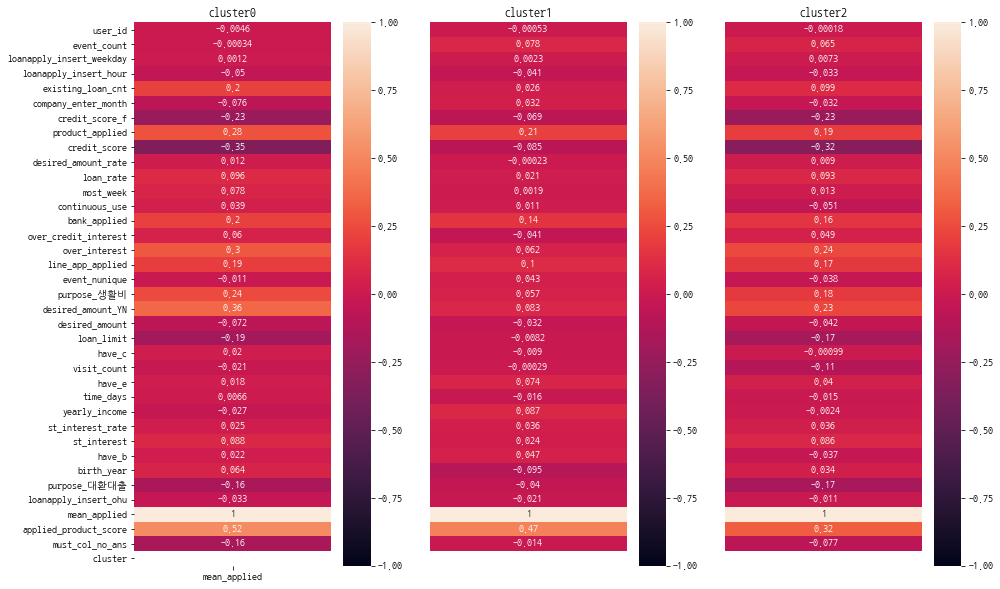

In [101]:
# 각 군집별 mean_applied와 피처간의 상관계수 파악
import seaborn as sns

fig, axes = plt.subplots(1,3,figsize=(15,10))
sns.heatmap(pd.DataFrame(d0.corr()['mean_applied']),annot=True,ax=axes[0], vmin=-1, vmax=1)
sns.heatmap(pd.DataFrame(d1.corr()['mean_applied']),annot=True,ax=axes[1], vmin=-1, vmax=1)
sns.heatmap(pd.DataFrame(d2.corr()['mean_applied']),annot=True,ax=axes[2], vmin=-1, vmax=1)
axes[0].set_title('cluster0')
axes[1].set_title('cluster1')
axes[2].set_title('cluster2')
axes[1].axis('off')
axes[2].axis('off')

plt.show()

In [82]:
# 각 그룹별 피처 평균 파악
d.groupby('cluster').mean()

,user_id,event_count,loanapply_insert_weekday,loanapply_insert_hour,existing_loan_cnt,company_enter_month,credit_score_f,product_applied,credit_score,desired_amount_rate,...,yearly_income,st_interest_rate,st_interest,have_b,birth_year,purpose_대환대출,loanapply_insert_ohu,mean_applied,applied_product_score,must_col_no_ans
cluster,,,,,,,,,,,,,,,,,,,,,
0,438542.991881,1.208859,2.402679,13.353406,2.875645,3.260032,0.132654,0.063221,650.952810,4.075238,...,3.884655e+07,8.821820,12.409112,-0.576176,1981.221413,0.254974,0.640434,0.241312,85.614593,0.649268
1,441151.591019,5.800974,2.592559,13.691159,2.153422,5.362307,0.576012,0.051506,831.877385,1.763078,...,5.787463e+07,7.807923,10.530343,0.327159,1981.482419,0.313514,0.653454,0.018540,42.634900,0.496833
2,439600.864118,8.781670,2.355493,13.033151,3.935669,2.971810,0.117011,0.063203,638.814635,4.190050,...,3.679785e+07,9.515463,12.765565,0.660802,1983.527680,0.266317,0.610297,0.285920,113.088790,0.544693


군집 별 차이가 많이 나는 feature 중 대출에 대한 부담감에 영향을 미칠 것으로 예상되는 feautre를 선정하여 세부 파악 진행

- mean_applied

In [83]:
ma_012 = list([d0['mean_applied'].mean(), d1['mean_applied'].mean(), d2['mean_applied'].mean()])
ma_012

[0.24131217606807084, 0.01853976121505487, 0.2859202529450959]

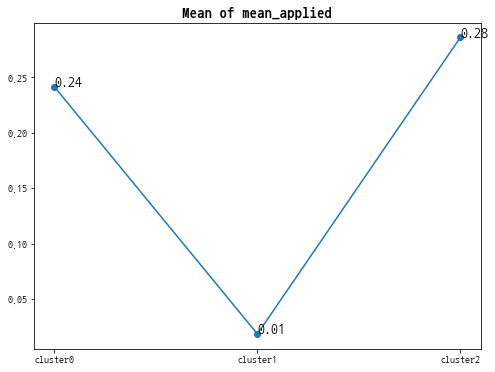

In [84]:
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],ma_012,marker='o')

for i in range(3):
    plt.text(i, ma_012[i]+0.001, str(ma_012[i])[:4], size=14)

plt.title('Mean of mean_applied', size=15, fontweight='bold')
plt.show()

클러스터1 : application에서 추천된 대출을 신청할 확률이 적은 군집  
(클러스터0,2는 비슷)

mean_applied는 application에서 product가 많이 추천되었을수록 낮은 경향을 보임.   
즉, mean_applied가 낮다고 해서 단순히 신청을 안한다기 보다는, product가 여러개 추천됐고, 그래서 신청확률이 낮은 군집으로 판단 가능

- applied_product_score

In [85]:
aps_012 = list([d0['applied_product_score'].mean(), d1['applied_product_score'].mean(), d2['applied_product_score'].mean()])
aps_012

[85.6145926861657, 42.63490036512444, 113.0887895487147]

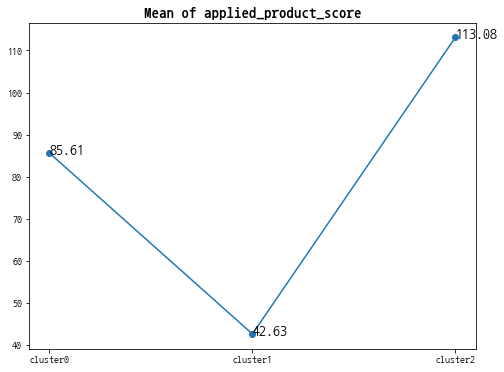

In [86]:
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],aps_012,marker='o')

for i in range(2):
    plt.text(i, aps_012[i]+0.001, str(aps_012[i])[:5], size=14)
plt.text(2,aps_012[2]+0.001, '113.08', size=14)

plt.title('Mean of applied_product_score', size=15, fontweight='bold')
plt.show()

사람들이 선호하는 상품을 신청할 확률 : 클러스터2 > 클러스터0 > 클러스터1  
즉, 대출에 진입장벽을 느낄 확률은 클러스터2가 가장 크고, 클러스터1이 가장 적음

- must_col_no_ans

In [87]:
mcna_012 = list([d0['must_col_no_ans'].mean(), d1['must_col_no_ans'].mean(), d2['must_col_no_ans'].mean()])
mcna_012

[0.6492678599995304, 0.496832915633813, 0.5446925871410763]

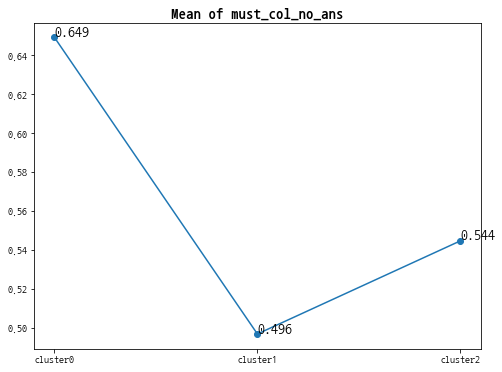

In [88]:
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],mcna_012,marker='o')

for i in range(3):
    plt.text(i, mcna_012[i]+0.001, str(mcna_012[i])[:5], size=14)

plt.title('Mean of must_col_no_ans', size=15, fontweight='bold')
plt.show()

**군집별 핀다 대출에 대한 관심도를 알 수 있음**  
클러스터0 : 자신의 금융정보 파악 정도를 가장 잘 알고있는 군집  
클러스터1 : 자신의 정보 기입 누락 비율로 보아 핀다에 대한 인식이 낮음을 유추

- purpose_생활비

In [89]:
sh = list([d0['purpose_생활비'].mean(), d1['purpose_생활비'].mean(), d2['purpose_생활비'].mean()])
sh

[0.6004554012632414, 0.32905235592427473, 0.6448764725047905]

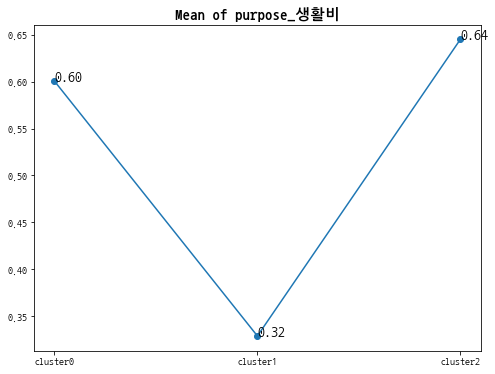

In [90]:
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],sh,marker='o')

for i in range(3):
    plt.text(i, sh[i]+0.001, str(sh[i])[:4], size=14)

plt.title('Mean of purpose_생활비', size=15, fontweight='bold')
plt.show()

- purpose_대환대출

In [91]:
dh = list([d0['purpose_대환대출'].mean(), d1['purpose_대환대출'].mean(), d2['purpose_대환대출'].mean()])
dh

[0.25497383818916475, 0.31351396828059225, 0.2663169794282627]

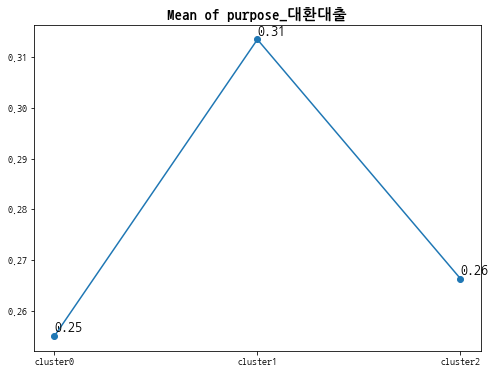

In [92]:
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],dh,marker='o')

for i in range(3):
    plt.text(i, dh[i]+0.001, str(dh[i])[:4], size=14)

plt.title('Mean of purpose_대환대출', size=15, fontweight='bold')
plt.show()

클러스터0, 클러스터2 : 생활비대출이 목적인 군집  
클러스터1 : 대환대출이 목적인 군집

- credit_score_f

In [93]:
csf = list([d0['credit_score_f'].mean(), d1['credit_score_f'].mean(), d2['credit_score_f'].mean()])
csf

[0.13265386144265742, 0.5760124491267804, 0.11701068151137475]

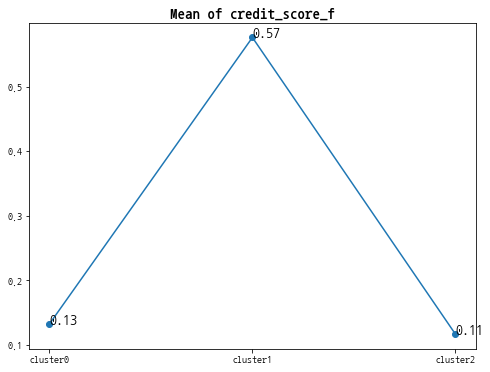

In [94]:
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],csf,marker='o')

for i in range(3):
    plt.text(i, csf[i]+0.001, str(csf[i])[:4], size=14)

plt.title('Mean of credit_score_f', size=15, fontweight='bold')
plt.show()

클러스터1 : 신용점수가 높은 군집

---

클러스터0 : 대출에 진입장벽 ^, 대출 관련 정보를 잘 암, 생활비대출 목적

->  대출에 대한 관심은 있지만, 조금의 진입장벽을 느끼며, 생활비대출을 목적으로 핀다를 사용하는 군집 **"기존 계획서 상 A그룹과 일치"**
  
클러스터1 : 대출에 진입장벽 X, application에서 추천된 대출을 신청할 확률이 적음, 대환대출 목적, 신용점수가 높음

-> 신용점수가 높아 신청할 수 있는 상품의 수가 많고 대출에 대한 진입장벽이 낮지만, 대출 관련 정보를 잘 모르며 대환대출을 목적으로 핀다를 사용하는 군집 **"기존 계획서의 B그룹과  유사"**
  
클러스터2 : 대출에 진입장벽 O, 생활비대출 목적  
  
-> 대출에 대한 진입장벽이 높으며, 핀다 서비스에 대한 이해도가 낮지만, 생활비대출을 목적으로 핀다를 사용하는 군집 **"기존 계획서 상 C그룹과 일치"**

---

추가 EDA 진행

- existing_loan_cnt

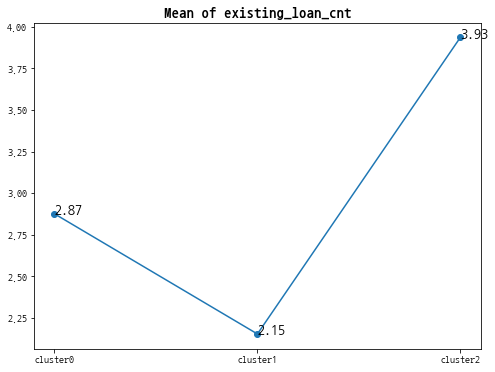

In [95]:
elc = list([d0['existing_loan_cnt'].mean(), d1['existing_loan_cnt'].mean(), d2['existing_loan_cnt'].mean()])
elc

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],elc,marker='o')

for i in range(3):
    plt.text(i, elc[i]+0.001, str(elc[i])[:4], size=14)

plt.title('Mean of existing_loan_cnt', size=15, fontweight='bold')
plt.show()

- continuous_use

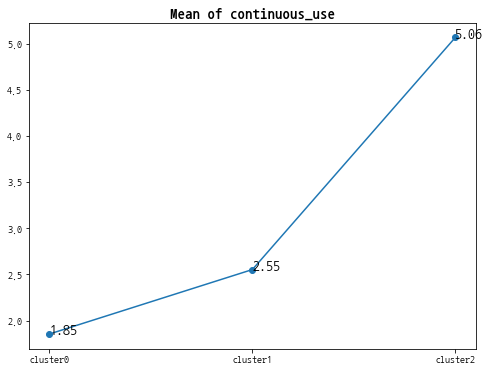

In [96]:
cu = list([d0['continuous_use'].mean(), d1['continuous_use'].mean(), d2['continuous_use'].mean()])
cu

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],cu,marker='o')

for i in range(3):
    plt.text(i, cu[i]+0.001, str(cu[i])[:4], size=14)

plt.title('Mean of continuous_use', size=15, fontweight='bold')
plt.show()

- line_app_applied

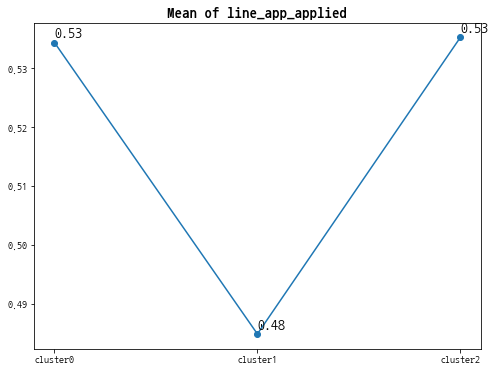

In [97]:
laa = list([d0['line_app_applied'].mean(), d1['line_app_applied'].mean(), d2['line_app_applied'].mean()])
laa

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],laa,marker='o')

for i in range(3):
    plt.text(i, laa[i]+0.001, str(laa[i])[:4], size=14)

plt.title('Mean of line_app_applied', size=15, fontweight='bold')
plt.show()

- desired_amount_rate

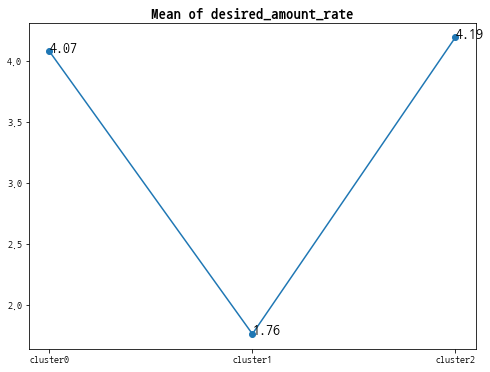

In [98]:
dar = list([d0['desired_amount_rate'].mean(), d1['desired_amount_rate'].mean(), d2['desired_amount_rate'].mean()])
dar

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],dar,marker='o')

for i in range(3):
    plt.text(i, dar[i]+0.001, str(dar[i])[:4], size=14)

plt.title('Mean of desired_amount_rate', size=15, fontweight='bold')
plt.show()

- desired_amount

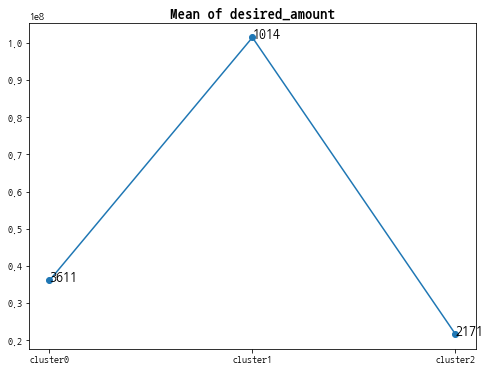

In [99]:
da = list([d0['desired_amount'].mean(), d1['desired_amount'].mean(), d2['desired_amount'].mean()])
da

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(['cluster0','cluster1','cluster2'],da,marker='o')

for i in range(3):
    plt.text(i, da[i]+0.001, str(da[i])[:4], size=14)

plt.title('Mean of desired_amount', size=15, fontweight='bold')
plt.show()